# 1er TP de sistemas inteligentes

Nombre:

Este trabajo práctico se aprueba completando más del 70% del mismo. Una vez completado el notebook y reenvielo al email 2329034@ucc.edu.ar. Importante: Asegurese que su correo haya llegado.

### Entender el problema

El hundimiento del Titanic es uno de los naufragios más infames de la historia. El 15 de abril de 1912, durante su viaje inaugural, el RMS Titanic, considerado ampliamente "insumergible", se hundió después de chocar con un iceberg. Desafortunadamente, no había suficientes botes salvavidas para todos a bordo, lo que resultó en la muerte de 1502 de los 2224 pasajeros y tripulantes.

Si bien hubo cierto elemento de suerte en sobrevivir, parece que algunos grupos de personas tenían más probabilidades de sobrevivir que otros.

    Siendo la clase positiva la indicación qué la persona sobrevive ¿Qué le estaría pidiendo a mi clasificador qué tenga en cuenta si le pido un puntaje de precision alto?

<10%>
Respuesta:

### Obtención de datos
Importe las librerías a utilizar:

In [221]:
import pandas as pd



Importe los datos:

In [222]:
#url = ""
#df = pd.read_csv(url)
#Comento por una cuestion de convension
url = 'https://gitlab.com/francisco.arduh/datasets/-/raw/main/Titanic-Dataset.csv'
titanic_data = pd.read_csv(url)

#Aca desplegamos la tabla para visualizat basicamente los datos que tenemos en el dataset
display(titanic_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<10%> Realice una exploración de los datos, compruebe si existe faltante de datos en alguna columna, que tipo de distribución tienen los datos, si alguna columna tiene muchos datos únicos.

Exploracion de datos
En esta instancia lo que hare es revisar dentro del display de datos de arriba,
verificar que datos son nulos, clasificar las caracteristicas, ya sean numericas o categoricas,etc.

-Podemos determinar que en la columna Age,Cabin y Embarked existen datos nulos

-Podemos identificar que no todas las caracteristicas son numericas, por lo que
con OneHotEncoder, LabelEncoder, entre otras clases podremos convertirlos en numericas


In [223]:
#Paso de explotacion de datos



# Ver información general del dataset
print(titanic_data.info())

# Verificar si hay datos faltantes
print(titanic_data.isnull().sum())

# Estadísticas descriptivas del dataset
print(titanic_data.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

<5%> Separar X_train, y_train, X_test, y_test

En este paso lo que haremos es separar los datos de entrenamiento y de prueba, en este paso dividimos el dataset en dos partes, una de entrenamiento, que serian las caracteristicas y se entrenaria y prueba que serian los datos que usariamos para evaluar el rendimeinto del modelo. La idea es medir que tan bien generaliza el modelo, es decir que tan bien predice ante datos nuevos o que no vio anteriormente.

-Divido en X (caracteristicas) e Y (Etiquetas o variable objetivo), basicamente para que en X queden los datos que vamos a entrenar y en Y los datos de la variable objetivo para luego evaluar el rendimeinto 

In [224]:
from sklearn.model_selection import train_test_split
X=titanic_data.drop(['Survived'], axis=1)
Y=titanic_data['Survived']
#Verifico que se haya eliminado la columna Survived en X
print(X.head())
#Verifico que se haya guardado en Y la columna Survived
print(Y.head())


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S  
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


Para seguir ahondando en el dataset, haremos una serie de histogramas y graficos que nos permitiran analizar la relacion de sus caracteristicas

     PassengerId  Pclass                                             Name  \
140          141       3                    Boulos, Mrs. Joseph (Sultana)   
439          440       2           Kvillner, Mr. Johan Henrik Johannesson   
817          818       2                               Mallet, Mr. Albert   
378          379       3                              Betros, Mr. Tannous   
491          492       3                              Windelov, Mr. Einar   
..           ...     ...                                              ...   
835          836       1                      Compton, Miss. Sara Rebecca   
192          193       3  Andersen-Jensen, Miss. Carla Christine Nielsine   
629          630       3                         O'Connell, Mr. Patrick D   
559          560       3     de Messemaeker, Mrs. Guillaume Joseph (Emma)   
684          685       2                Brown, Mr. Thomas William Solomon   

        Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Pclass'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>],
       [<AxesSubplot:title={'center':'Survived'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

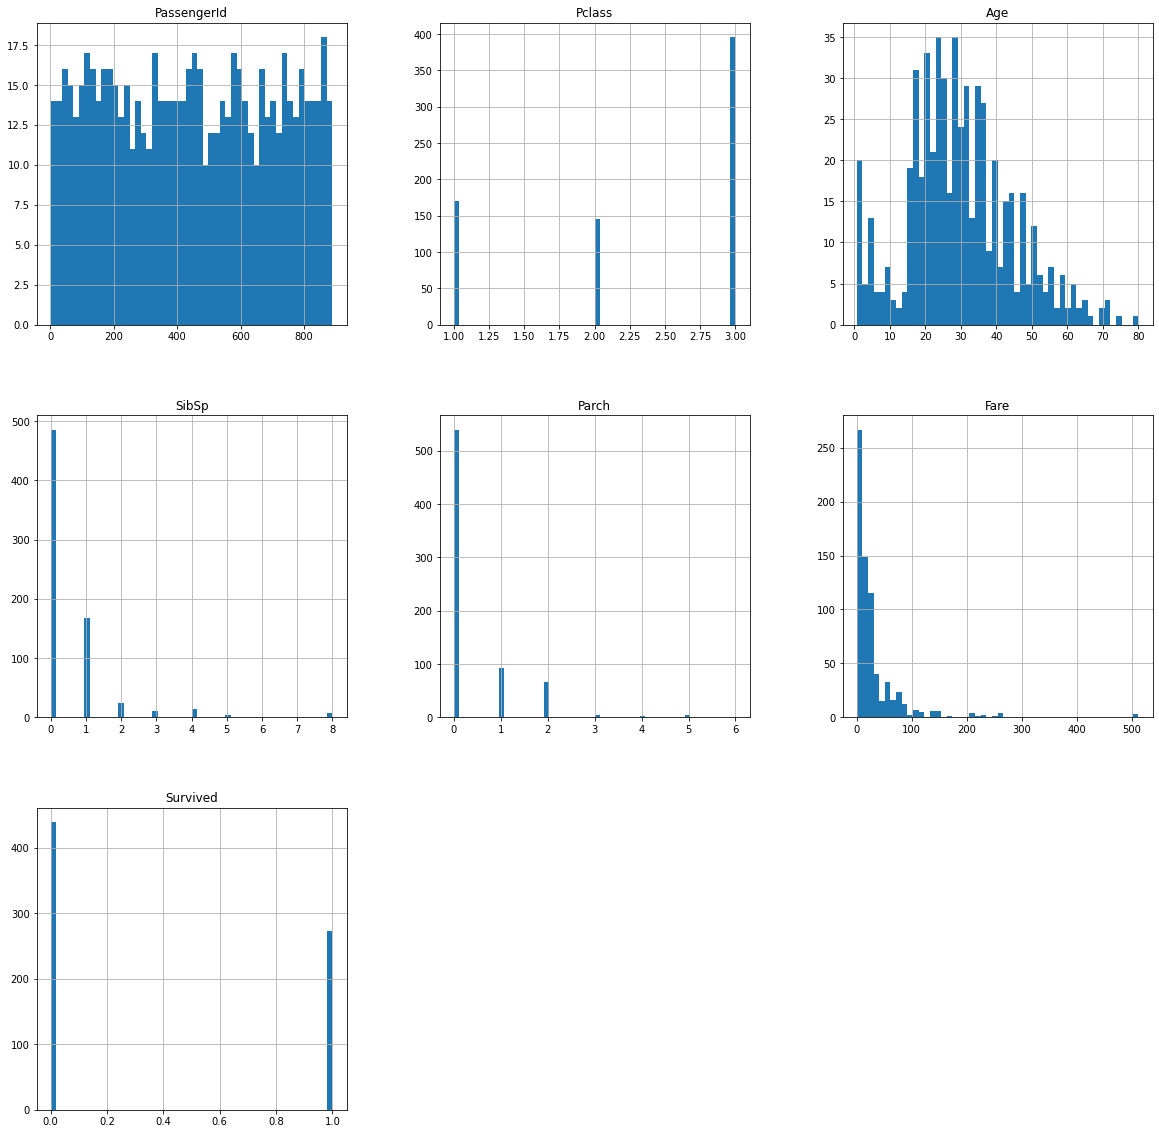

In [225]:

#Uno los datos de entrenamiento y prueba
train_data= x_train.join(y_train)
print(train_data)

#Genero histograma
train_data.hist(bins=50,figsize=(20,20))

Tambien podemos generar la correlacion para poder atarnos de la variable objetivo y podemos analizar la relacion de las diferentes variables, determinar como funcionan los datos.


In [226]:
#Hago la correlacion con respecto a la variable objetivo

corr=train_data.corr()
print(corr['Survived'].sort_values(ascending=False))

Survived       1.000000
Fare           0.229665
Parch          0.081027
PassengerId   -0.006709
SibSp         -0.047006
Age           -0.101539
Pclass        -0.314294
Name: Survived, dtype: float64


/tmp/ipykernel_12754/3366060072.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=train_data.corr()


/tmp/ipykernel_12754/3710170011.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu', ax=ax)


<AxesSubplot:>

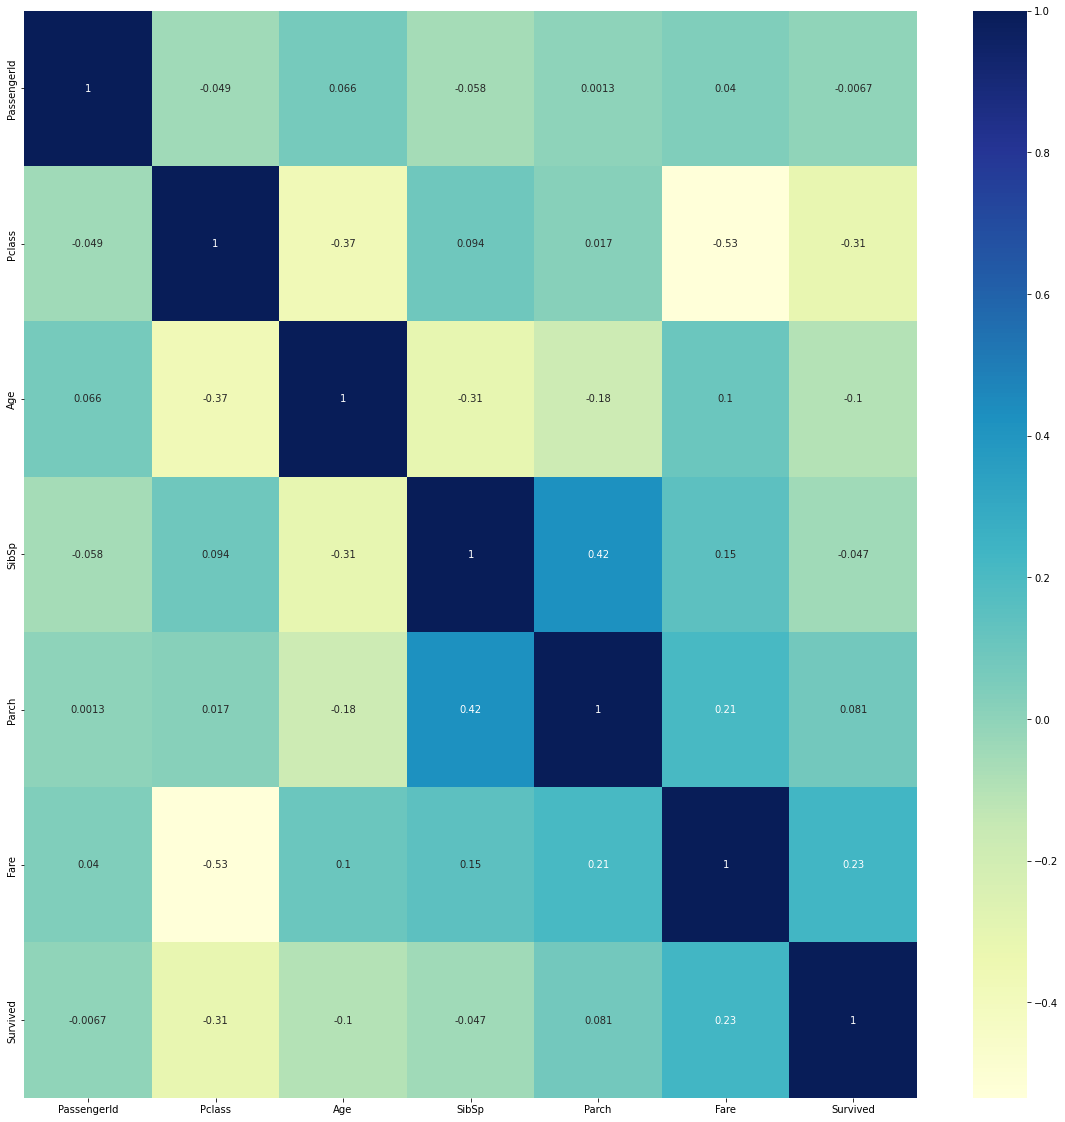

In [227]:
from matplotlib import pyplot as plt
import seaborn as sns 
#seguimos con la exploracion de los datos, realizo un 
# heat map para ver la correlacion entre las variables de forma grafica
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu', ax=ax)

### Procesado y transformación de datos
<10%> ¿Qué transformaciones debería aplicar? Especifique y justifique por grupo de columnas.

Por ejemplo: columna A, B y C aplicaría transformación X porque ...

Escriba los nombres de las columna en una lista por cada grupo:


Una vez visualizado los datos. Por columnas voy a expresar que transformacion haria

Columnas:

1)  Sex,Name,Embarked,Ticket: Aplicaria una transformacion con la clase OneHotEncoder o LabelEncoder porque son variables categoricas y no son continuas o no siguen un orden
2) Cabin contiene datos nulos, tengo varias opciones, borrar todas las filas que sean nulas
o usar el imputter para que a todos los valores que sean nulos, le calculo la media de ese resultado pero si es categorico antes deberia convertirlo a numerico. 



<15%> A continuación escriba el código para realizar las transformaciones transformaciones

In [228]:
from sklearn.calibration import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.calibration import LabelEncoder
#1) Voy a utilizar LabelEncoder para la transformacion
le = LabelEncoder()
X['Name'] = le.fit_transform(X['Name'])
X['Sex'] = le.fit_transform(X['Sex'])
X['Embarked'] = le.fit_transform(X['Embarked'])
X['Ticket'] = le.fit_transform(X['Ticket'])
X['Cabin'] = le.fit_transform(X['Cabin'])
#Verifico que se hayan convertido
print(X.head())


#Aplico one hot encoding

# Creamos un objeto encoder para codificar las características categóricas mediante one-hot encoding
encoder = OneHotEncoder()

# Aplicamos la codificación a un conjunto de datos
X_encoded = encoder.fit_transform(X)

# Creamos un objeto encoder para codificar las características categóricas mediante encoding ordinal
encoder = OrdinalEncoder()

# Aplicamos la codificación a un conjunto de datos
X_encoded = encoder.fit_transform(X)


   PassengerId  Pclass  Name  Sex   Age  SibSp  Parch  Ticket     Fare  Cabin  \
0            1       3   108    1  22.0      1      0     523   7.2500    147   
1            2       1   190    0  38.0      1      0     596  71.2833     81   
2            3       3   353    0  26.0      0      0     669   7.9250    147   
3            4       1   272    0  35.0      1      0      49  53.1000     55   
4            5       3    15    1  35.0      0      0     472   8.0500    147   

   Embarked  
0         2  
1         0  
2         2  
3         2  
4         2  


In [229]:
#2 Esta columna Cabin, es relevante para determinar si sobrevivio o no. Entonces
#convierto la variable categorica a numerica y le aplico la media para reemplazar 
# los valores faltantes
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='mean')

# Aplicamos la imputación a un conjunto de datos
X_imputed = imputer.fit_transform(X)
X['Age'] = X['Age'].fillna(X['Age'].mean())
X['Fare'].fillna(X['Fare'].median(), inplace=True)
print(X.isnull().sum())

display(X.head())

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,3,15,1,35.0,0,0,472,8.0500,147,2


### Selección de modelo y entrenamiento
 


In [230]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
cla_log = LogisticRegression()
cla_rf = RandomForestClassifier()

<15%>Utilice validación cruzada para evaluar los modelos que se importaron. Utilice el de area bajo la curva roc mas alto.
Utilizar el metodo "cross_val_predict", tenga en cuenta que la variable, "method" para el LogisticRegression es "decision_function" y para RandomForestClassifier es "predict_proba" (ver clase o libro)

Bien abajo

<10%>¿Por qué lo eligiria el modelo por el area bajo la curva roc?

Porque sirve para evaluar el desempeño que tiene un modelo, en este caso de clasificacion binaria, ayuda a ver la capacidad que tenemos para distinguir entre las clases positivas y negativas, sin importar el umbral que se uso. 

Por ejemplo: apartir de los verdaderos positivos, que seria en este caso al tasa para clasificar correctamente a las personas que sobrevivieron y los falsos positivos para determinar cuantas veces el modelo predice mal. Entonces si vemos la curva roc, vamos a elegir el que mayor area tenga bajo la curva porque quiere decir que tiene mas verdaderos positivos.

Entonces determinamos que el mejor es random forest




In [231]:
from sklearn.metrics  import accuracy_score
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
cla_log = LogisticRegression()
cla_rf = RandomForestClassifier()
y_train_1=(y_train==1)
y_test_1=(y_test==1)




x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

#Creo una variable de clasificacion
y_train_1=(y_train==1)
y_test_1=(y_test==1)


#Selecciono el modelo de clasificacion
model=RandomForestClassifier()

#Entreno el modelo
model_train=model.fit(x_train,y_train_1)
#determino el valor en la region de entrenamiento con score
pred_train=model_train.score(x_train,y_train)
print("Valor en la region de entrenamiento con random: ",pred_train)

#Predigo los datos
y_test_pred=model.predict(x_test)


#Validacion cruzada
crossAccuracy=cross_val_score(model,X,Y,cv=5)
print("Validacion cruzada con random: : ",crossAccuracy)


print("Valor en la region de prueba con random: ",accuracy_score(y_test_1,y_test_pred))


#Ahora voy a usar el modelo de regresion logistica

#Selecciono el modelo de clasificacion
model2=LogisticRegression()

#Entreno el modelo
model_train=model.fit(x_train,y_train_1)
#determino el valor en la region de entrenamiento con score
pred_train=model_train.score(x_train,y_train)
print("Valor en la region de entrenamiento  con logistic: ",pred_train)

#Predigo los datos
y_test_pred=model.predict(x_test)


#Validacion cruzada
crossAccuracy=cross_val_score(model,X,Y,cv=5)
print("Validacion cruzada con logistic: ",crossAccuracy)


print("Valor en la region de prueba con logistic: ",accuracy_score(y_test_1,y_test_pred))



Valor en la region de entrenamiento con random:  1.0
Validacion cruzada con random: :  [0.79329609 0.81460674 0.85955056 0.83707865 0.85393258]
Valor en la region de prueba con random:  0.8435754189944135
Valor en la region de entrenamiento  con logistic:  1.0
Validacion cruzada con logistic:  [0.80446927 0.80898876 0.86516854 0.83146067 0.88202247]
Valor en la region de prueba con logistic:  0.8547486033519553


<15>Utilice el metodo grid search sobre el modelo elegido  
en caso de ser LogisticRegression
```
param_grid = [
{'C': [0.1, 1, 10], 'penalty': ['elasticnet'], 'l1_ratio': [0.,0.2,0.4]}
]
```
en caso de ser RandomForest utilize:
```
param_grid = [
{'n_estimators': [30, 100], 'max_features': [2, 4, 6, 8]}
]
```
¿Cuál es el sentido de hacer esto?

-El sentido de ajustar los hiperparametros, es encontrar una combinacion de los parametros que permita optimizar el rendimiento que tenemos en nuestro modelo sobre un conjunto de datos. Este ayuda a la precision, reduce y ayuda a evitar el riesgo de el overfitting, entre otros beneficios. A continuacion ajusto los hiperparametros de RandomForest

In [232]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
param_grid = [
{'n_estimators': [30, 100], 'max_features': [2, 4, 6, 8]}
]

#defino la funcion de busqueda en cuadricula
GridSearch=GridSearchCV(RandomForestClassifier(),param_grid,cv=3,scoring='accuracy')
#entreno el modelo en funcion de busqueda de cuadricula
GridSearch.fit(x_train,y_train_1)

#Busco los mejores hiperparametros 
best_params=GridSearch.best_params_
#Re entreno con los mejores parametros

#Defino el mejor modelo, el ** es para pasarle los datos de los hiperparametros
best_model=RandomForestClassifier(**best_params,random_state=42)
#Defino el mejor pipeline
best_pipeline = make_pipeline(
    StandardScaler(),
    best_model
)
#Re entreno el modelo
best_pipeline.fit(x_train, y_train_1)
accuracy=cross_val_score(best_pipeline,x_train,y_train_1,cv=5,scoring='accuracy')
print("SGD con hiperparametros: ",accuracy)

#hago el display de X nomas para verificar
display(X)

SGD con hiperparametros:  [0.81818182 0.8951049  0.78873239 0.82394366 0.80985915]


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,108,1,22.000000,1,0,523,7.2500,147,2
1,2,1,190,0,38.000000,1,0,596,71.2833,81,0
2,3,3,353,0,26.000000,0,0,669,7.9250,147,2
3,4,1,272,0,35.000000,1,0,49,53.1000,55,2
4,5,3,15,1,35.000000,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,548,1,27.000000,0,0,101,13.0000,147,2
887,888,1,303,0,19.000000,0,0,14,30.0000,30,2
888,889,3,413,0,29.699118,1,2,675,23.4500,147,2
889,890,1,81,1,26.000000,0,0,8,30.0000,60,0


<5%>Imprima el valor de accuracy, recall, precision, f1 y auc_roc, en las regiones de validación

Todo lo que sigue es la representacion de los graficos

In [234]:
#Genero la matriz de confusion
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

y_pred=cross_val_predict(RandomForestClassifier(),x_train,y_train_1,cv=3)
confusion_matrix(y_train_1,y_pred)

array([[391,  48],
       [ 79, 194]])

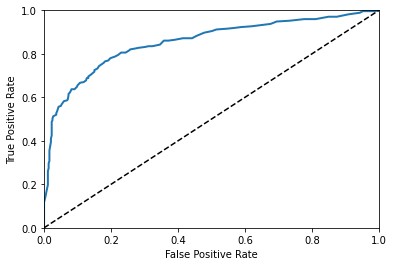

In [235]:
#Implementamos ROC curve
from sklearn.metrics import roc_curve


# Obtener las probabilidades de la clase positiva mediante validación cruzada
y_probas_forest = cross_val_predict(RandomForestClassifier(), x_train, y_train_1, cv=3, method="predict_proba")

# Seleccionar sólo la probabilidad de la clase positiva
y_scores_forest = y_probas_forest[:, 1]


# Calcular la tasa de falsos positivos (fpr), tasa de verdaderos positivos (tpr) y 
# umbrales para la curva ROC
#por parametros se le pasa el score que esta en la feature anterior
fpr, tpr, thresholds = roc_curve(y_train_1, y_scores_forest)

# Definir una función para graficar la curva ROC
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)  # Graficar la curva ROC
    plt.plot([0, 1], [0, 1], 'k--')  
    plt.axis([0, 1, 0, 1])  
    plt.xlabel('False Positive Rate')  
    plt.ylabel('True Positive Rate')  
# Graficar la curva ROC utilizando la función definida
plot_roc_curve(fpr, tpr)
plt.show()

In [268]:
#Impleentamos la Precision y recall
from sklearn.metrics import precision_score, recall_score




#comparar modelos con curva roc, en este caso RandomForest y Logistic


print("#############################################")
# Crear el clasificador RandomForestClassifier
from sklearn.metrics import roc_auc_score


forest_clf = RandomForestClassifier(random_state=42)

# Obtener las probabilidades de la clase positiva mediante validación cruzada
y_probas_forest = cross_val_predict(forest_clf, x_train, y_train_1, cv=3, method="predict_proba")

# Seleccionar sólo la probabilidad de la clase positiva
y_scores_forest = y_probas_forest[:, 1]
print(y_scores_forest)

#calculo la precision en la region de validacion
print("Precision: ",precision_score(y_train_1,y_scores_forest))

#calculo el recall en la region de validacion
print("Recall: ",recall_score(y_train_1,y_scores_forest))

#Implementamos f1 score en la region de validacion
from sklearn.metrics import f1_score
print("F1 Score:", f1_score(y_train_1,y_scores_forest))




# Esto para calcular el area bajo la curva
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_1, y_scores_forest)
roc_auc_forest = roc_auc_score(y_train_1, y_scores_forest)
print("AUC-ROC para RandomForestClassifier: ", roc_auc_forest)
print("#############################################")
# Crear el clasificador LogisticRegression
log_clf = LogisticRegression(random_state=42)

# Oobtengo el score con cross val
y_scores_log = cross_val_predict(log_clf, x_train, y_train_1, cv=3, method="decision_function")
#y_scores_log = (y_scores_log[:, 1])




#calculo la precision en la region de validacion
print("Precision: ",precision_score(y_train_1,y_scores_log))

#calculo el recall en la region de validacion
print("Recall: ",recall_score(y_train_1,y_scores_log))

#Implementamos f1 score en la region de validacion
from sklearn.metrics import f1_score
print("F1 Score:", f1_score(y_train_1,y_scores_log))




# Calcular la curva ROC y el área bajo la curva ROC
fpr_log, tpr_log, thresholds_log = roc_curve(y_train_1, y_scores_log)
roc_auc_log = roc_auc_score(y_train_1, y_scores_log)
print("AUC-ROC para LogisticRegression: ", roc_auc_log)

# Graficar la curva ROC para comparar
plt.plot(fpr_forest, tpr_forest, "g:", label="RandomForestClassifier")
plt.plot(fpr_log, tpr_log, "b:", label="LogisticRegression")
plt.legend(loc="lower right")
plt.show()

#############################################
[0.66 0.21 0.41 0.15 0.21 0.23 0.22 0.81 0.15 0.07 0.96 0.65 0.54 0.64
 0.55 0.14 0.37 0.03 0.71 0.41 0.24 0.06 0.46 0.05 0.73 0.06 0.39 0.66
 0.16 0.83 0.04 0.2  0.59 0.03 0.77 0.21 0.01 0.42 0.54 0.33 0.94 0.02
 0.87 0.68 0.   0.29 0.06 0.02 0.71 0.04 0.11 0.02 1.   0.74 0.75 0.29
 0.25 0.86 0.89 0.65 0.02 0.14 0.97 0.42 0.06 0.85 0.55 0.55 0.22 0.21
 0.76 0.02 0.1  0.53 0.05 0.13 0.57 0.67 0.1  0.15 0.07 0.   0.34 0.12
 0.21 0.23 0.5  0.51 0.06 0.27 0.86 0.28 0.1  0.59 0.4  0.45 0.05 0.14
 0.05 0.46 0.7  0.04 0.87 0.22 0.77 0.07 0.05 0.37 0.39 0.02 0.62 0.29
 0.12 0.79 0.93 0.82 0.28 0.17 0.33 0.31 0.05 0.98 0.06 0.12 0.63 0.5
 0.82 0.49 0.1  0.52 0.18 0.44 0.34 0.54 0.02 0.2  0.54 0.21 0.04 0.
 0.53 0.14 0.7  0.89 0.81 0.37 0.11 0.63 0.12 0.6  0.14 0.83 0.11 0.15
 0.14 0.09 0.11 0.17 0.45 0.89 0.06 0.11 0.05 0.12 0.14 0.55 0.68 0.77
 0.26 0.05 0.45 0.81 0.56 0.06 0.09 0.74 0.17 0.96 0.56 0.19 0.25 0.41
 0.88 0.93 0.89 0.67 0.99 0.63 0.1

ValueError: Classification metrics can't handle a mix of binary and continuous targets

Aca en el grafico de arriba podemos ver que random forest tiene un area debajo de la curva mas grande que logistic, abajo calculo la metrica del area bajo la curva de ambos modelos para verificar y efectivamente
RandomForest tiene: 0.8486320058074044
Logistic tiene: 0.8023313057481621

In [ ]:
#Valores de precision y recall

    <5%>Imprima el valor de accuracy, recall, precision, f1 y auc_roc, en las regiones de test, 
    ¿Los números son parecido a lo obtenido en las regiones de validación? ¿A qué puede deberse?